In [1]:
%run ../../utils/commonImports.py
%matplotlib inline

# Load Data

In [2]:
data_split_root = 'D:\\Dropbox\\My work\\krypl-project\\dataSplit\\01-priceMovement'

In [3]:
featuresRoot = 'D:\\Dropbox\\My work\\krypl-project\\dataFeatures'
fileName = 'return-01-loss-max-01-within-day.tsv'
featuresFile = f'{featuresRoot}\\{fileName}'
featured = read_tsv(featuresFile).sort_values('timestamp')
featured = reset_index_hard(featured)

In [4]:
featured.head()

,timestamp,period,open,high,low,close,volume,quoteVolume,weightedAverage,date,...,vma2016,ma_12_108,ma_36_288,ac36,ac288,vol36,vol288,vol2016,dv_36_288,dv_288_2016
0,1424373000,5min,225.0000,225.0000,225.0000,225.0000,1.0000,0.0044,225.0000,2015-02-19 19:10:00,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,1424373300,5min,225.0000,225.0000,225.0000,225.0000,0.0000,0.0000,225.0000,2015-02-19 19:15:00,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,1424373600,5min,225.0000,225.0000,225.0000,225.0000,0.0000,0.0000,225.0000,2015-02-19 19:20:00,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,1424373900,5min,225.0000,225.0000,225.0000,225.0000,0.0000,0.0000,225.0000,2015-02-19 19:25:00,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,1424374200,5min,225.0000,225.0000,225.0000,225.0000,0.0000,0.0000,225.0000,2015-02-19 19:30:00,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


# Split for modeling and strategy testing

In [5]:
featured['date'].max()

'2018-10-05 13:15:00'

In [6]:
start_date_for_strategy_testing = '2017-10-05'
strategy_testing_data = featured.query(f'date >= "{start_date_for_strategy_testing}"')
strategy_testing_data = reset_index_hard(strategy_testing_data.sort_values('timestamp'))

In [7]:
strategy_testing_data['date'].min(), strategy_testing_data['date'].max()

('2017-10-05 00:00:00', '2018-10-05 13:15:00')

In [8]:
modeling_data = featured.query(f'date < "{start_date_for_strategy_testing}"')
modeling_data = reset_index_hard(modeling_data.sort_values('timestamp'))

In [9]:
modeling_data['date'].min(), modeling_data['date'].max()

('2015-02-19 19:10:00', '2017-10-04 23:55:00')

# Find date till when are data meaningful

Need to be run in jupyter hub

<IPython.core.display.Javascript object>


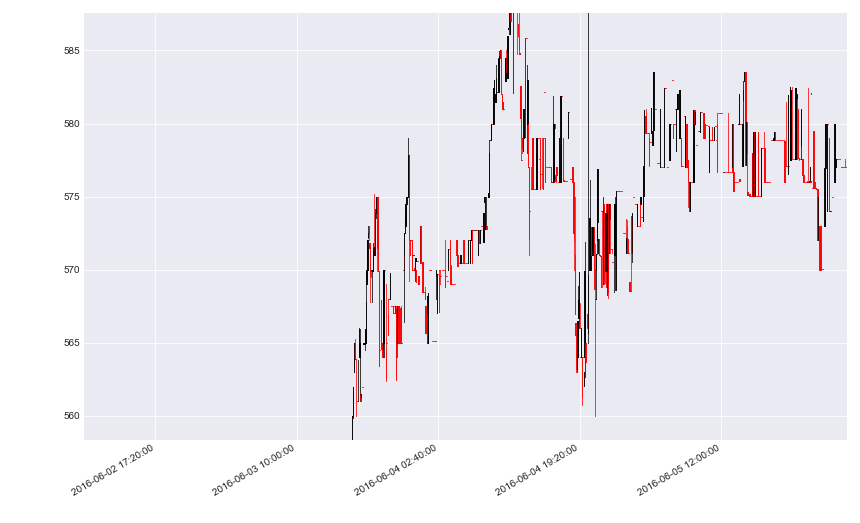

(<Figure size 720x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1deac40a160>)

In [13]:
%matplotlib notebook
plot_candles(modeling_data.query('date > "2016-05"').query('date < "2016-08"'))

In [14]:
start_date_for_modeling_data = '2016-06-01'

modeling_data_selected = modeling_data.query(f'date > "{start_date_for_modeling_data}"')
modeling_data_selected = reset_index_hard(modeling_data_selected.sort_values('timestamp'))

In [17]:
modeling_data_selected.head()

,timestamp,period,open,high,low,close,volume,quoteVolume,weightedAverage,date,...,vma2016,ma_12_108,ma_36_288,ac36,ac288,vol36,vol288,vol2016,dv_36_288,dv_288_2016
0,1464739200,5min,530.0000,530.0000,530.0000,530.0000,186.5600,0.3520,530.0000,2016-06-01 00:00:00,...,-0.3214,0.7629,-0.5784,1.0312,-2.2894,-0.8301,-0.6122,1.6049,-0.7188,-0.8553
1,1464739500,5min,529.9800,529.9800,529.9800,529.9800,154.0319,0.2906,529.9800,2016-06-01 00:05:00,...,-0.3375,0.7749,-0.5700,1.1301,-2.2809,-0.8266,-0.7203,1.5866,-0.7155,-0.9373
2,1464739800,5min,527.3914,527.3914,527.3914,527.3914,21.0941,0.0400,527.3914,2016-06-01 00:10:00,...,-0.4017,0.7538,-0.5961,1.1910,-2.2707,-0.6732,-0.7639,1.6219,-0.5697,-0.9711
3,1464740100,5min,527.3914,527.3914,527.3914,527.3914,0.0000,0.0000,527.3914,2016-06-01 00:15:00,...,-0.4103,0.7691,-0.5861,1.2094,-2.2670,-0.8648,-0.8754,1.6102,-0.7511,-1.0554
4,1464740400,5min,527.3914,527.3914,527.3914,527.3914,0.0000,0.0000,527.3914,2016-06-01 00:20:00,...,-0.4080,0.7887,-0.5730,1.2312,-2.2562,-0.8678,-1.0006,1.5982,-0.7531,-1.1500


# Drop non feature cols

In [18]:
drop_cols = ['timestamp', 'period', 'open', 'high', 'low', 'close', 'volume',
       'quoteVolume', 'weightedAverage', 'date', 'maxReturn', 'tillMax',
       'minReturn', 'label']
X = modeling_data_selected.copy()
for col in drop_cols:
    X = X.drop(col, axis=1)
y = modeling_data_selected['label'].apply(int)

# Test Train Validation Split

In [19]:
from sklearn.model_selection import train_test_split
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.33)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.33)

<IPython.core.display.Javascript object>


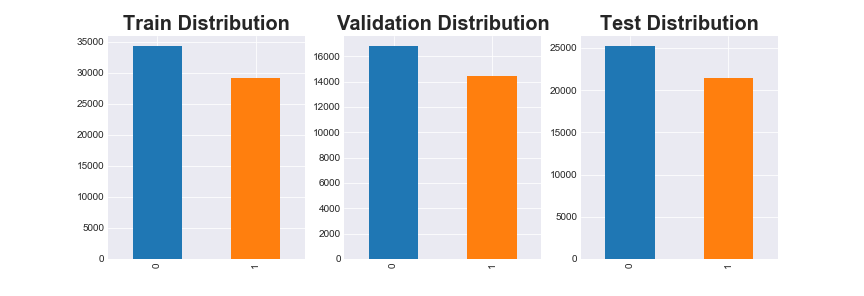

Text(0.5,1,'Test Distribution')

In [20]:
fig, axes = plt.subplots(1, 3, figsize=[12, 4])
y_train.value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('Train Distribution', fontproperties=title_font)
y_val.value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title('Validation Distribution', fontproperties=title_font)
y_test.value_counts().plot(kind='bar', ax=axes[2])
axes[2].set_title('Test Distribution', fontproperties=title_font)

In [21]:
def write_split(root):
    write_tsv(X_train, f"{root}/X_train.tsv")
    write_tsv(y_train, f"{root}/y_train.tsv")
    write_tsv(X_val, f"{root}/X_val.tsv")
    write_tsv(y_val, f"{root}/y_val.tsv")
    write_tsv(X_test, f"{root}/X_test.tsv")
    write_tsv(y_test, f"{root}/y_test.tsv")
    
write_split(data_split_root)
write_tsv(strategy_testing_data, f'{data_split_root}/strategy_test.tsv')
write_tsv(modeling_data_selected, f'{data_split_root}/strategy_train.tsv')